# Time series forecasting using ARIMA

Hello everyone, welcome to the next project from AIML Community which is about using time-series for future prediction. Time-series forecasting is a component of machine learning which is often given less weightage owing to its complexity. Temporal component of the time-series often discourages machine learning practitoners from utilizing this. But its impact can be wide-reaching. The most important utilization of this has been done in weather forecasting, stock market prices prediction, etc. 

This is a 4 week module and you need to follow along weekly modules and if you any doubts regarding the module, you can contact the mentors. Let us get started! 

## What is a time series?

A time series is a sequence of observations taken sequentially in time. The sequences from the prior data is used to predict the future ahead. Every instance of time is denoted by t, next moment as (t+1), the next one as (t+2) and so on. Time from the past is indicated as (t-1), (t-2) and so on. 

## What can be done with a time-series?

There are two things that can majorly be done with time-series, i.e. analysis and prediction.

You can analyze the data, determine the impact of features on the data and use it to look at various parameters which are affecting the time-series. Quoting from the book, **Time Series Analysis and Its Applications**, The primary objective of time series analysis is to develop mathematical models that provide plausible descriptions from sample data. 

After you are done analyzing the data, you can use various algorithms and methods to predict the futture outcome. You can use statistical methods like ARIMA or SARIMA, deep learning algrithms like LSTM, there are in-built tools like Facebook's prophet that can be used to fit the data and make predictions. 

## What are the various components of a time-series?

Time series broadly has 4 constituent parts which can be used in the time-series analysis: 

**1. Level**: The baseline value for the series if it were a straight line.

**2. Trend**: The optional and often linear increasing or decreasing behavior of the series over
time.

**3. Seasonality**: The optional repeating patterns or cycles of behavior over time.

**4. Noise**: The optional variability in the observations that cannot be explained by the
model.

In this module, we will subsequently read about these components in the module in detail and will learn how to eliminate the trend, seasonality and noise so that better prediction can be made about the data. 

## What is to be kept in mind while doing time-series analysis?

**What is the goal?**

First step is to define a concrete problem statement and decide what is the it that you want to do with time-series. Furthermore, you also need to be sure whether your prediction will be short-term, medium-term or long-term. This will help you in analysis and prediction.

**What is the data that you have?**

While it is a good idea to have as much data as you can, make sure that data that you have is good in quality.If it has a lot of missing values and outliers which cannot be mended after a certain point, it will not be very useful. 

**Can we predict almost everything?**

Well yes and no. Yes, for things which have a pattern and do not involve a lot of randomness. While, for things which are random, similar thing cannot be said. An example would be winning a lottery, sure, you can enhance your chances of winning but you can't predict. If you want to know more about what I am talking, you can watch the move named 21! One of my favorite movies of all times. 

## How do we turn a time-series into a supervised learning problem?

This issue took me almost 2-3 days to find out. There were a lot of resources present online, which did not throw a lot of light on how you can turn a time series into a machine learning problem with dependent and independent variables. I finally found this out in an ebook by Jason Brownlee. 

#### Supervised Machine Learning v/s time series

Supervised Machine Learning takes the input varibale (X) and output variables (Y) and maps them in such a way that:
Y=f(X). The Breast Cancer dataset that you'd have worked on is a data which can be very well used to train a supervised machine learning algorithm.

#### Q 1: Take any data from the internet and form a supervised machine learning problem around it. 

Now, in case of time-series, the date as such cannot be used to train a model. Let me explain all this with help of codes:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from pandas.plotting import register_matplotlib_converters
sns.set()
plt.rcParams["figure.figsize"] = [16,9]

E:\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("Air_Passenger.csv")
df['Month']=pd.to_datetime(df['Month'], infer_datetime_format=True)
indf=df.set_index(['Month'])
indf.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


You can notice in the data that the input variable is the date and the output variable is the numbers of passengers on the airlines. Now, dates as such doen't give corresponding figure as to how things are changing. It can be used to see the trend and perform EDA but again, you need the data in a proper format. This is what I was not able to find at a place and I did find it in the book. Please re-write the codes in your notebook to get a better understanding. Let me show you: 

In [3]:
series = pd.read_csv("Air_Passenger.csv", header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t','t+1']
print(dataframe.head(5))

       t  t+1
0    NaN  112
1  112.0  118
2  118.0  132
3  132.0  129
4  129.0  121


This format not only explains how time series can be used in the form of supervised learning algorithm, it also explains the terms lag and rolling window statistics which we will learn subsequently. Please note that earlier I had made a dataframe and later, I made a series. 

#### Q 2: What is the difference between a dataframe and a series? What are the different types of datatypes present in Pandas?

## Time-series analysis 

After we have known the basic elemental details of the time-series, let us move on and see the analysis of our dataset at hand

I am going to assume that you know the basics already. If you don't, please do our Breast Cancer detection project first. 

In [4]:
df.shape

(144, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


#### Q 3: Explain all the metrics which I have written codes about. For example, explain what did you infer from the code df.describe()

Now we will move on and perform some visaulization of the data. 

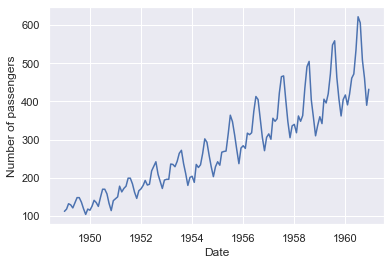

In [7]:
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.plot(series)

Just by looking at the above data, you can infer that the output variable is not constant with respect to time and it keep changing (increasing in fact). The increment is not constant, it decreases sometimes or increases. We will have to tranform this series a bit to get desired outputs. We can also make a histogram to see where our data lies. 

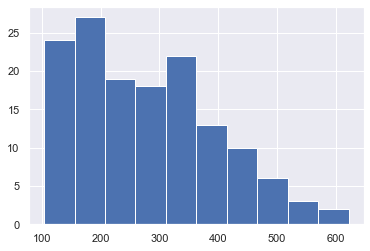

In [8]:
series.hist()
plt.show()

The data shown above has a skew, towards the right. We can make this a normal distribution with some transformation. Now let us make a boxplot:

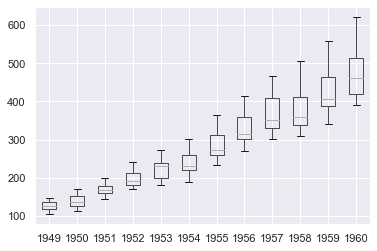

In [9]:
from pandas import DataFrame
from pandas import Grouper
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

This is all for week 1 and now the assignment for this week is to answer all the questions above and 

## Preprocessing the temperature Dataset

The dataset which we will be using in the assignment requires a bit of preprocessing which will be done in couple of codes below. 

In [10]:
data=pd.read_csv("testset.csv")
data.head()

,datetime,Temperature
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


Now, we will convert the datetime in the required format so that we can use it further for our analysis. 

### Q 5: Read about the functions used in the code and write about it 

In [11]:
data['datetime'] = pd.to_datetime(data['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))
data['datetime'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime, dtype: datetime64[ns]

In [12]:
data = data.set_index('datetime',drop=True)
data.index.name = 'datetime'

Our data has been modified as such that we can use for our analysis. I am going to visualize the data against time:

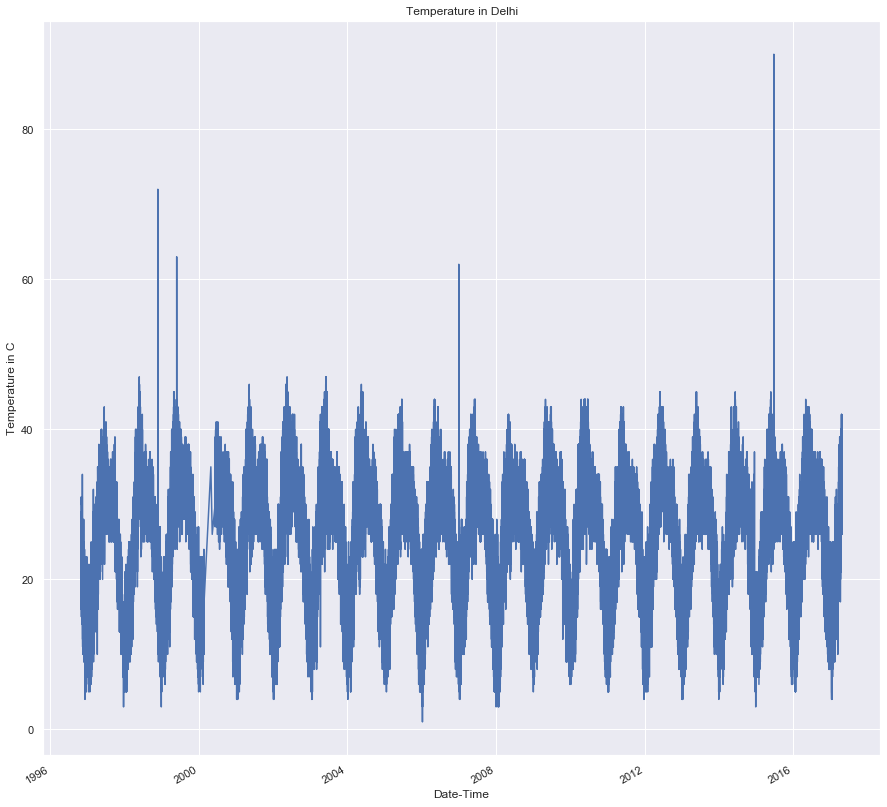

In [13]:
fig, ax = plt.subplots()
data['Temperature'].plot(figsize=(15,15),ax=ax)
ax.set_xlabel('Date-Time')
ax.set_ylabel('Temperature in C')
ax.set_title('Temperature in Delhi')
plt.show()

There are missing values around the year 2000. Sure, we can clean the data but cliamte change renders the earlier data as useless, so we will be using data from 2001 onwards. You have the choice to clean the data and use it. I am going to drop data before 2001 for convenience. Also, I am going to resample the data for better analysis. 

In [14]:
data = data['2001':]


newdata = data.resample('M').mean().interpolate()
data1=newdata.groupby(newdata.index.year).mean()
newdata['Year'] = newdata.index.year
newdata['Month'] = newdata.index.month
newdata.head()

,Temperature,Year,Month
datetime,,,
2001-01-31,12.568436,2001,1
2001-02-28,18.241270,2001,2
2001-03-31,23.494737,2001,3
2001-04-30,29.781388,2001,4
2001-05-31,33.019526,2001,5


### Q 6: Analyze the mean temperature data which will be attached with the files on Github

I will be attaching the above data with the assignment files. 